<a href="https://colab.research.google.com/github/grodriguez1123/Metodos1_AndreaRocha_GabrielaRodriguez/blob/main/Parcial_1_M%C3%A9todos_Computacionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

7: Minimización del camino óptico

a. (Theoretical) Muestre que el tiempo de viaje t(x) y por tanto el camino ´optico
ct(x) del pulso de luz est´a dado por:

b) Implemente la funci´on camino ´optico en Python y grafiquelo para algunos valores de x. Antes de nada, identifique cualitativamente el lugar donde se minimiza el tiempo de viaje del pulso.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

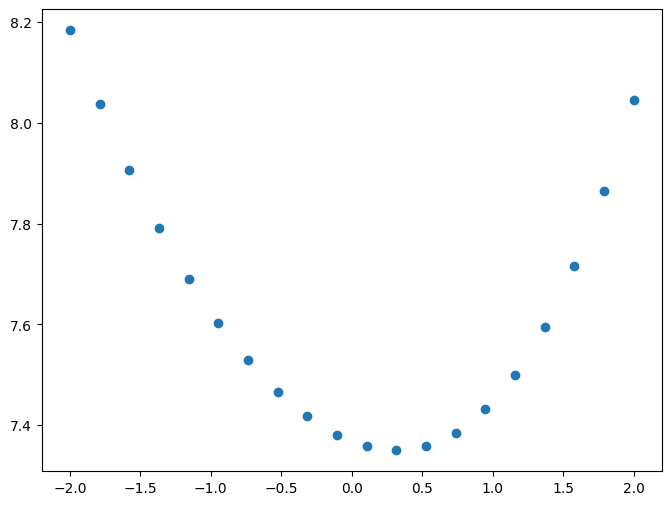

In [3]:
T = np.array([-3, 2])
R = np.array([2, -2])
n0 = 1
n1 = 1.33

def camino_optimo(x):

    term1 = n0 * np.sqrt((x - T[0])**2 + T[1]**2)
    term2 = n1 * np.sqrt((x - R[0])**2 + R[1]**2)
    return term1 + term2

x_vals = np.linspace(T[1], R[1], 20)
t_vals = camino_optimo(x_vals)


plt.figure(figsize=(8, 6))
plt.scatter(x_vals, t_vals, label="Tiempo de viaje del pulso de luz")
plt.show()


In [4]:
def Derivative(f,x,h=1e-5):
  return (f(x+h)-f(x-h))/(2*h)

def Derivative2(f,x,h=1e-5):
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)

def GetNewtonMethod(f,xn,itmax=100,precision=1e-9):

  error = 1
  it = 0

  while error > precision and it < itmax:
    try:
      xn1 = xn - Derivative(f,xn)/Derivative2(f,xn)
      error = np.abs(Derivative(f,xn)/Derivative2(f,xn))
    except ZeroDivisionError:
      print('Division by zero error')
    xn = xn1
    it += 1

  if it == itmax:
    return False
  else:
    return xn

x0 = (T[0] + R[0]) / 2
x_min = GetNewtonMethod(camino_optimo,x0)
t_min = camino_optimo(x_min)
print(x_min,t_min)

alpha_0 = np.arctan(T[1] / (x_min - T[0]))
alpha_1 =-1*(np.arctan((R[1]) / (R[0] - x_min)))
sin_alpha_0 = np.sin(alpha_0)
sin_alpha_1 = np.sin(alpha_1)

verificar_snell = np.isclose(sin_alpha_0, 1.33 * sin_alpha_1, rtol=1e-5)

print(f"Ángulo de incidencia α0: {np.degrees(alpha_0):.2f} grados")
print(f"Ángulo de refracción α1: {np.degrees(alpha_1):.2f} grados")
print(f"¿Cumple la Ley de Snell?: {verificar_snell}")

0.3169057571073043 7.349795676886238
Ángulo de incidencia α0: 31.09 grados
Ángulo de refracción α1: 49.92 grados
¿Cumple la Ley de Snell?: False


5: Raíces de los primeros 5 polinomios de Laguerre

In [5]:
def GetNewtonMethod(f,df,xn,itmax = 10000, precision=1e-14):

    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(xn)

            error = np.abs( (xn1-xn)/xn )
           # error = np.abs(f(xn)/df(xn))

        except ZeroDivisionError:
            print("zero division")
        xn  = xn1
        it += 1

    if it == itmax:
        return False
    else:
        return xn

In [6]:
def GetAllRoots(f,df,x, tolerancia=13):

    Roots = np.array([])

    for i in x:

        root = GetNewtonMethod(f,df,i)

        if root != False:

            croot = np.round( root, tolerancia )

            if croot not in Roots:
                Roots = np.append( Roots, croot )


    Roots.sort()

    return Roots

In [7]:
def GetLaguerre(n):

  x = sym.Symbol('x',Real=True)
  y = sym.Symbol('y',Real=True)

  y = (x**n)*(sym.exp(-x))

  p = sym.diff(y,x,n)*(sym.exp(x)/np.math.factorial(n))

  return p

In [8]:
Laguerre = []
DLaguerre = []

x = sym.Symbol('x',Real=True)
n=5

for i in range(n+1):

    poly = GetLaguerre(i)

    Laguerre.append(poly)
    DLaguerre.append(sym.diff(poly,x))

<ipython-input-7-3757e721f8df>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)*(sym.exp(x)/np.math.factorial(n))


In [9]:
def GetRootsPolynomial(n,xi,poly,dpoly):

    x = sym.Symbol('x',Real=True)
    pn = sym.lambdify([x],poly[n],'numpy')
    dpn = sym.lambdify([x],dpoly[n],'numpy')
    Roots = GetAllRoots(pn,dpn,xi)

    return Roots

In [10]:
xi = np.linspace(-100,100,100,dtype=np.longdouble)
Roots = []

for i in range(5):
  Roots.append(GetRootsPolynomial(i+1,xi,Laguerre,DLaguerre))

In [11]:
#Respuesta
Roots

[array([1.], dtype=float128),
 array([0.58578644, 3.41421356], dtype=float128),
 array([0.41577456, 2.29428036, 6.28994508], dtype=float128),
 array([0.32254769, 4.5366203 , 9.39507091], dtype=float128),
 array([ 0.26356032,  1.41340306,  3.59642577,  7.08581001, 12.64080084],
       dtype=float128)]

Pregunta 7

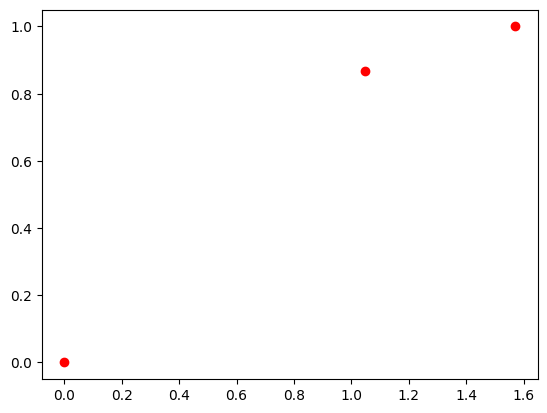

In [14]:
#A

X = np.array([0,(np.pi/3),(np.pi/2)])
Y = np.sin(X)

plt.scatter(X,Y,color='r')

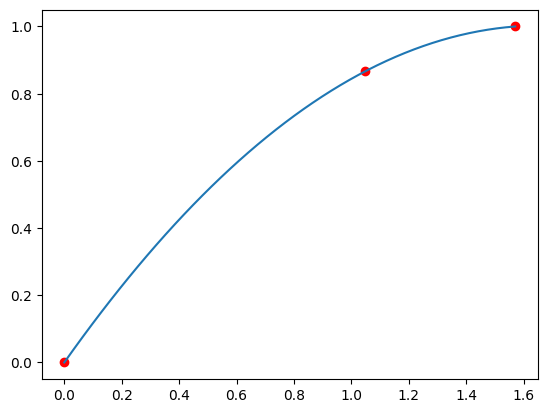

In [17]:
#B

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

x1 = np.linspace(X[0],X[-1],50)
y1 = Interpolate(x1,X,Y)

plt.plot(x1,y1)
plt.scatter(X,Y,color='r')

In [18]:
#c

Xestimado = Interpolate(np.pi/8,X,Y)
Xestimado

0.41820893444311996

In [19]:
#d

Xtrue = np.sin(np.pi/8)

error = np.abs(Xtrue - Xestimado)
error

0.03552550207803018

In [22]:
#e
derivada_tercera

def error_teorico(x,X, xi):
    derivada_tercera = (xi)
    factorial = np.FPE_DIVIDEBYZEROmath.factorial(3)  # n+1 = 3 para 3 nodos
    error = (derivada_tercera / factorial) * (x - X[0]) * (x - X[1]) * (x - X[2])
    return error
